# Exercise 11 : MFKZIZ004

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [45]:
# problem parameters
c=0.5       # Advection speed [m s-1]
dx=200      # X resolution [m]
dt=200      # time step [s]
t0=0.       # initial time
tmax=0.1    # duration of simulation [days]
xmax=10.0e3 # length of the basin [m]

# Parameters of the initial temperature distribution
T0 = 15.        # baseline temperature [degC]
sigma = 2000.   # width at half amplitude [m]
A = 5.          # amplitude [degC]

In [39]:
# Spatial shape of the temperature disturbance
def Gaussian(x):
    y = T0+A*np.exp(-(x/sigma)**2)
    return y

In [47]:
# time axis
NT = int(np.floor(tmax*86400/dt))+1  # number of steps (starts from 0)
# X axis (centred at 0)
x = np.arange(-xmax,xmax,dx)
IM = len(x)             # number of grid points
T = np.zeros([IM,NT])     # the array holding the numerical solution 
print('Grid steps : ',IM)
print('Number of time steps : ',NT)
print('Timestep = ',dt,' s')
print('Max numerical speed DX/DT = ',dx/dt,' m/s')
print('Physical speed = ',c,' m/s')
print('Courant number = ',c*dt/dx)

Grid steps :  100
Number of time steps :  44
Timestep =  200  s
Max numerical speed DX/DT =  1.0  m/s
Physical speed =  0.5  m/s
Courant number =  0.5


In [49]:
# Compute the numerical solution using a time loop over the number of time steps
T[:,0] = Gaussian(x)    # initial condition

for n in range(NT-1):
    # Question 1
    T[0,n+1]  = T0
    T[-1,n+1] = T0
    # Question 2 and Question 3
    rhs = -c*(T[2:,n]-T[:-2,n])/(2.*dx) # L1
    T[1:-1,n+1] = T[1:-1,n] + rhs*dt    # L2

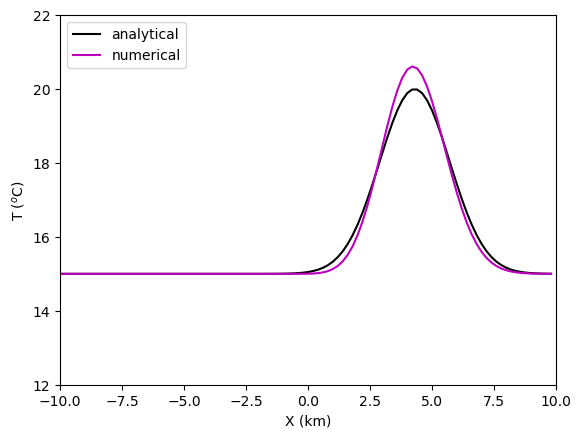

In [51]:
fig, ax = plt.subplots()
# set the axis limits
plt.axis([-xmax/1000, xmax/1000, T0-3, T0+7])
# first plot the initial conditions and set the line attributes
line, = ax.plot(x/1000., Gaussian(x),'k',label='analytical')
sol, = ax.plot(x/1000., T[:,0],'m',label='numerical')
ax.set_xlabel('X (km)')
ax.set_ylabel('T ($^o$C)')
plt.legend(loc='upper left')

def animate(i):
    t = t0 + i*dt
    line.set_ydata(Gaussian(x-c*t))  # update the analytical solution
    sol.set_ydata(T[:,i])  # update the numerical solution
    return line,sol,

# create the animation and loop (interval is in ms)
ani = animation.FuncAnimation(
    fig, animate, interval=dt, blit=True, frames=NT, repeat=True)

# To save the animation, use e.g.
# ani.save("movie.mp4")
# or
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

# display the animation as a javascript object embedded in the notebook
from IPython.display import HTML
HTML(ani.to_jshtml())

#### (1)  Look for the comment #Question 1 in the code. What do you think the next two lines do?
- The next two lines give us the boundary conditions in spatial resolution (space), the first point is 0 and the second point is -1. Temperature is set a baseline of T0 of 15°C. 

#### (2)  Look for #Question 2 in the code. Which component of the numerical scheme is implemented in line #L1? What does line #L2 do?
- The central difference method has been used to solve the spatial changes in temperature in #L1.
- In #L2 the obtained difference is used in #L2 to look at changes in temperature over time. 

#### (3)  Look for #Question 3 in the code. Why the code does not perform the computation on all the elements of the array T, i.e. T[:,n]?
- From question 1, we have noted that the temperature has boundary conditions ( at 0 and -1 points).
- We also noted that we have TO of 15°C, the reason why the code is not performing the computation on all elements is because the boundary conditions are fixed for each time step. Thus, the moethod is only working for points that are in this range. 

#### (4)  Analysis of the numerical solution. How different is the numerical solution from the expected moving perturbation? What is the possible reason?
- The numerical solution seems to have a smaller width and this makes it have a higher peak that the analtyical, this may be due to having a higher sigma value.

#### (5) Changing dx, dt and Co number, and seeing what happens:

### a. If you increase the Courant number to 1 by halving dx, what does it happen? 
- The numerical solution still follows the analytical solution, however the numerical solution has a higher peak in the wave compared to the analytical solution. The courant number is =1 so there is accuracy. 


### b. Now set dx = 500 m and dt = 100 s to get C = 0.1; what do you see and how would you interpret it?
- We have enhanced the accuracy, we have made the Courant number closer to zero. Even though the dx was higher, this created a higher peak in the numerical solution but beacuse the courant number is closer that zero the numerical solution is still able to the follow the analytical solution. 

#### (6) Set the parameter σ = 1000 m (a steeper wave). Make another copy of the original notebook and double the current speed. How would you explain the result

Grid steps :  40
Number of time steps :  87
Timestep =  100  s
Max numerical speed DX/DT =  5.0  m/s
Physical speed =  1.0  m/s
Courant number =  0.2


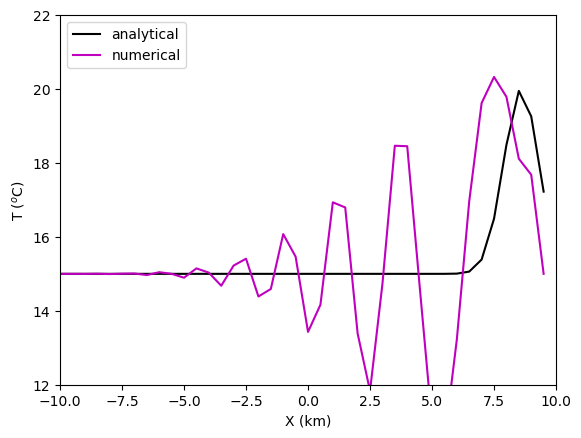

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
### In this code I have made sigma 1000 m and I have doubled the speed so that I can answer 
# the questions.

# problem parameters
c=1.0       # Advection speed [m s-1]
dx=500      # X resolution [m]
dt=100      # time step [s]
t0=0.       # initial time
tmax=0.1    # duration of simulation [days]
xmax=10.0e3 # length of the basin [m]

# Parameters of the initial temperature distribution
T0 = 15.        # baseline temperature [degC]
sigma = 1000.   # width at half amplitude [m]
A = 5.          # amplitude [degC]
# Spatial shape of the temperature disturbance
def Gaussian(x):
    y = T0+A*np.exp(-(x/sigma)**2)
    return y
    # time axis
NT = int(np.floor(tmax*86400/dt))+1  # number of steps (starts from 0)
# X axis (centred at 0)
x = np.arange(-xmax,xmax,dx)
IM = len(x)             # number of grid points
T = np.zeros([IM,NT])     # the array holding the numerical solution 
print('Grid steps : ',IM)
print('Number of time steps : ',NT)
print('Timestep = ',dt,' s')
print('Max numerical speed DX/DT = ',dx/dt,' m/s')
print('Physical speed = ',c,' m/s')
print('Courant number = ',c*dt/dx)
# Compute the numerical solution using a time loop over the number of time steps
T[:,0] = Gaussian(x)    # initial condition

for n in range(NT-1):
    # Question 1
    T[0,n+1]  = T0
    T[-1,n+1] = T0
    # Question 2 and Question 3
    rhs = -c*(T[2:,n]-T[:-2,n])/(2.*dx) # L1
    T[1:-1,n+1] = T[1:-1,n] + rhs*dt    # L2
fig, ax = plt.subplots()
# set the axis limits
plt.axis([-xmax/1000, xmax/1000, T0-3, T0+7])
# first plot the initial conditions and set the line attributes
line, = ax.plot(x/1000., Gaussian(x),'k',label='analytical')
sol, = ax.plot(x/1000., T[:,0],'m',label='numerical')
ax.set_xlabel('X (km)')
ax.set_ylabel('T ($^o$C)')
plt.legend(loc='upper left')

def animate(i):
    t = t0 + i*dt
    line.set_ydata(Gaussian(x-c*t))  # update the analytical solution
    sol.set_ydata(T[:,i])  # update the numerical solution
    return line,sol,

# create the animation and loop (interval is in ms)
ani = animation.FuncAnimation(
    fig, animate, interval=dt, blit=True, frames=NT, repeat=True)

# To save the animation, use e.g.
# ani.save("movie.mp4")
# or
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

# display the animation as a javascript object embedded in the notebook
from IPython.display import HTML
HTML(ani.to_jshtml())

#### Making sigma 1000 m: 
The sigma reduction to 1000 m  This could be fixed by making the dx smaller so that accuracy and stability can be enhanced. We should aslo decrease the change in time because I can see that the number of time steps has increased, this is not good because it will make the generation of the animation slower. 

#### Doubling of the speed to 1.0 m/s:
The higher speed (c), has made the numerical solution steeper and have more oscilations compared to the analytical solution. The speed of the numerical model is way faster than analytyical, thus decreasing stability. However, the courant number is still close to zero but the oscilations need to be fixed by making dx and dt smaller so that the animation wont be generated slower. 